## Animations

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc

rc('animation', html='html5')

The animation class includes a function `FuncAnimation` that incorporations a user-specified function to update the figure for each frame of the animation. The result is an animation object which is subsequently called to actually produce the desired animation.

### Step 1. Create the background frame.

The following cell creates a background frame for the animation. These are standard matplotlib graphics commands, but where we have kept a reference to the resulting objects. The objects include `fig` for the figure object, `ax1` and `ax2` for each of the two plotting axes, and then `txt_title`, `line1`, `line2`, `pt1`, and `line3` for graphical elements that will be updated in each frame of the animation.

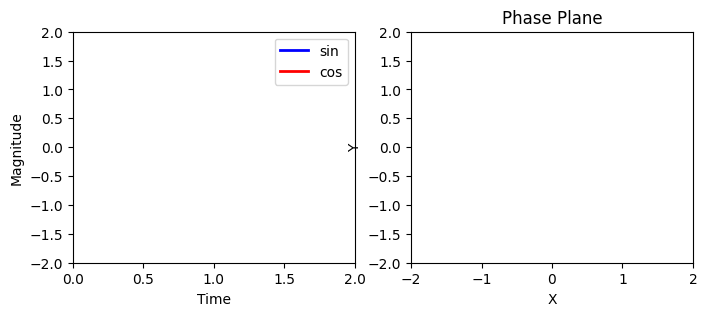

In [20]:
# create a figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame in the animation.
#Note the commas! that is because ax.plot returns a list of 2D line objects
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     
line2, = ax1.plot([], [], 'r', lw=2)
pt1,   = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);

### Step 2. Define a function to draw each frame

The animiation function is a function you define to draw individual frames in the animation. The variable `n` will be the frame number.  The function draws the frame by resetting the data values for the global objects `txt_title`, `line1`, `line2`, `pt1`, and `line3` that were defined above.

In [21]:
# animation function. This is called sequentially
def drawframe(n):
    
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    
    return (line1,line2) #once line1 and line2 updated other global objects update too

### Step 3. Create the Animation Object

The animation class includes a function `FuncAnimation` that incorporations a user-specified function to update the figure for each frame of the animation. The result is an animation object which is subsequently called to actually produce the desired animation.

In [22]:
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, 
                               drawframe, 
                               frames=100, 
                               interval=20, 
                               blit=True)

anim

/var/folders/g4/3dkh7n1s0bjbl1tm3bgvvdsm0000gn/T/ipykernel_9309/841757530.py:10: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(y1[0],y2[0])
/var/folders/g4/3dkh7n1s0bjbl1tm3bgvvdsm0000gn/T/ipykernel_9309/841757530.py:10: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(y1[0],y2[0])


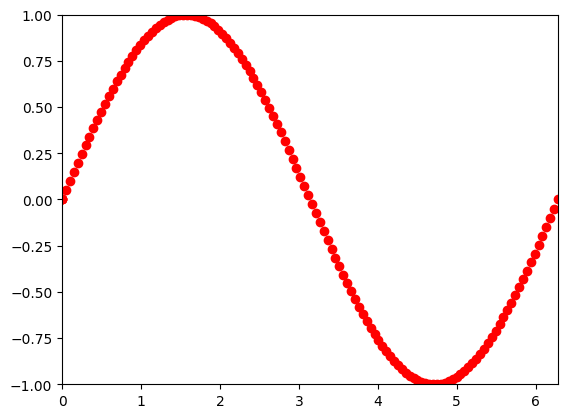

In [25]:
fig, ax = plt.subplots()
xdata, ydata = [], []

ln, = ax.plot([], [], 'ro')
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1, 1);

def update(frame):
    
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    
    return ln,

ani = animation.FuncAnimation(fig, 
                              update, 
                              frames=np.linspace(0, 2*np.pi, 128),
                              blit=True)
ani